# Cristina Venturini 2022461

## Assignement 4

In [1]:
library(tibble)
library(ggplot2)
library(latex2exp)
library(glue)
theme_set(theme_bw())
library(viridis)
library(patchwork)

Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'latex2exp' was built under R version 3.6.3"Warning message:
"package 'viridis' was built under R version 3.6.3"Loading required package: viridisLite
Warning message:
"package 'viridisLite' was built under R version 3.6.3"Warning message:
"package 'patchwork' was built under R version 3.6.3"

## Exercise 1 - Six Boxes Toy Model : inference

Labeling the boxes as follows:

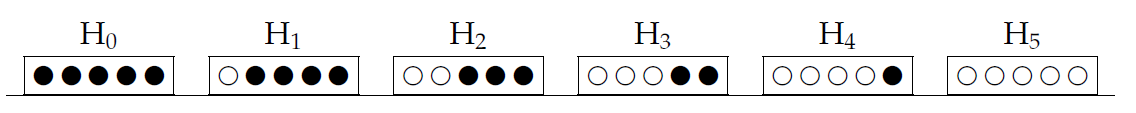

write a program in R that:
- allows the user to insert the color of a randomly extracted box and
- prints on the standard output the probability of selecting each box
- plots the probability for each box as a function of the extraction step

In [2]:
N=5; i=0:N; pii_w=i/N; pii_b=(N-i)/N

Here I randomly chose the colors of the balls and then I inserted the corresponding numbers in the prompt. I then saved the vector with the extractions, calculated the probabilities and made a plot. 

In [3]:
s = vector(); PBi = vector()
ext = readline(prompt='[White: 1, Black: 0, Quit: q]   ')
n = 0
while (ext!='q'){
    n = n + 1
    s = append(s, as.numeric(ext))
    x = sum(s)
    PBi = append(PBi, pii_w^x * (1-pii_w)^(n-x) / sum( pii_w^x * (1-pii_w)^(n-x) )) # calculate probabilities
    ext = readline(prompt='[White: 1, Black: 0, Quit: q]   ')
}

[White: 1, Black: 0, Quit: q]   1
[White: 1, Black: 0, Quit: q]   1
[White: 1, Black: 0, Quit: q]   1
[White: 1, Black: 0, Quit: q]   1
[White: 1, Black: 0, Quit: q]   1
[White: 1, Black: 0, Quit: q]   0
[White: 1, Black: 0, Quit: q]   0
[White: 1, Black: 0, Quit: q]   0
[White: 1, Black: 0, Quit: q]   1
[White: 1, Black: 0, Quit: q]   1
[White: 1, Black: 0, Quit: q]   0
[White: 1, Black: 0, Quit: q]   0
[White: 1, Black: 0, Quit: q]   0
[White: 1, Black: 0, Quit: q]   0
[White: 1, Black: 0, Quit: q]   1
[White: 1, Black: 0, Quit: q]   1
[White: 1, Black: 0, Quit: q]   1
[White: 1, Black: 0, Quit: q]   0
[White: 1, Black: 0, Quit: q]   0
[White: 1, Black: 0, Quit: q]   1
[White: 1, Black: 0, Quit: q]   1
[White: 1, Black: 0, Quit: q]   0
[White: 1, Black: 0, Quit: q]   1
[White: 1, Black: 0, Quit: q]   0
[White: 1, Black: 0, Quit: q]   1
[White: 1, Black: 0, Quit: q]   1
[White: 1, Black: 0, Quit: q]   1
[White: 1, Black: 0, Quit: q]   1
[White: 1, Black: 0, Quit: q]   1
[White: 1, Bla

In [4]:
PBi = matrix(PBi, nrow = n, ncol = 6, byrow = TRUE)
PBi_tot = c(PBi[,1], PBi[,2], PBi[,3], PBi[,4], PBi[,5], PBi[,6])
factor = rep(c('H0', 'H1', 'H2', 'H3', 'H4', 'H5'), each=n)
trials = rep(1:n, times = 6)
cat('P(Hi) for the first 10 extractions:')
head(PBi, 10)

P(Hi) for the first 10 extractions:

0,0.0666666667,0.133333333,0.20000000,0.2666667,0.3333333
0,0.0181818182,0.072727273,0.16363636,0.2909091,0.4545455
0,0.0044444444,0.035555556,0.12000000,0.2844444,0.5555556
0,0.0010214505,0.016343207,0.08273749,0.2614913,0.6384065
0,0.0002259887,0.007231638,0.05491525,0.2314124,0.7062147
0,0.0024844720,0.059627329,0.30186335,0.6360248,0.0000000
0,0.0069565217,0.125217391,0.42260870,0.4452174,0.0000000
0,0.0164271047,0.221765914,0.49897331,0.2628337,0.0000000
0,0.0054607509,0.147440273,0.49761092,0.3494881,0.0000000
0,0.0017112299,0.092406417,0.46780749,0.4380749,0.0000000


In [5]:
PBi_plot = tibble('trials' = trials, 'PBi' = PBi_tot, 'box' = factor)
PBi_plot$box = as.factor(PBi_plot$box)

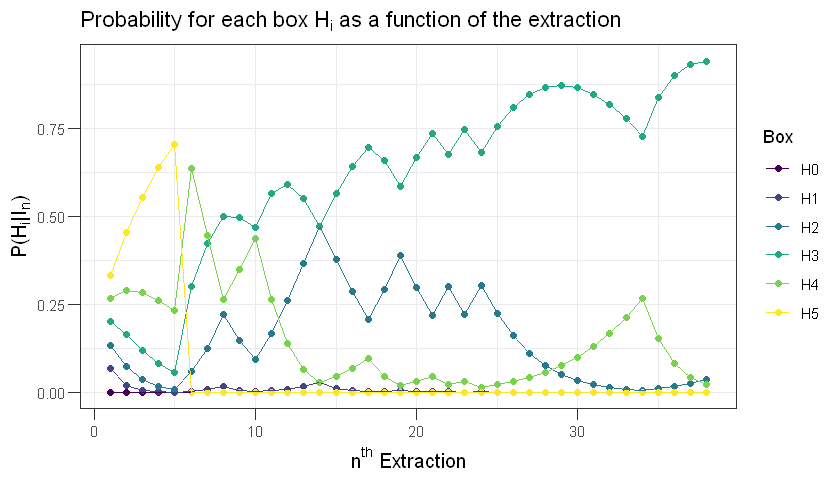

In [6]:
options(repr.plot.width=7, repr.plot.height=4)
ggplot(PBi_plot) + 
    geom_point(aes(trials, PBi, group= box, colour=box)) +
    geom_line(aes(trials, PBi, group = box, colour=box)) +
    labs(title=TeX('Probability for each box $H_i$ as a function of the extraction'), 
         x=TeX('$n^{th}$ Extraction'), y=TeX('$P(H_i | I_n)$'), col='Box') +
    scale_color_viridis(discrete=TRUE)+
    theme(plot.title = element_text(color="black", size=13
                                    , face="bold.italic"), 
              axis.title.x = element_text(color="black", size=12),
              axis.title.y = element_text(color="black", size=12), 
              axis.ticks.length=unit(.25, "cm"),
              axis.text.x = element_text(size=9),
              axis.text.y = element_text(size=9))

## Exercise 2 - Six Boxes Toy Model : simulation

Consider again the six boxes toy model of the previous exercise and write a simulation program that:
- selects a random box
- makes random sampling from the box
- prints on the standard output the probability of selecting each box
- plots the probability for each box as a function of the number of trial

After having read the referenced papers, I saw that in them the formulas for the computation of the probability are slightly different from the computations we made in class, but giving in any case the same results. <br>
I present here both approaches.

#### Method 1

In [7]:
set.seed(20160715)

In [8]:
N=5; i=0:N; pii_w=i/N; pii_b=(N-i)/N; n=100

In [9]:
ri = sample(i, 1)

In [10]:
s=rbinom(n,1,pii_w[ri+1])

In [11]:
PBi_g = matrix(1/6, nrow = 100, ncol = 6)

In [12]:
for(i in 1:100){
    if(i == 1){
        if(s[1]==1){
            PBi_g[1,] = (pii_w * PBi_g[1,])/sum(pii_w*PBi_g[1,])
        }
        if(s[1]==0){
            PBi_g[1,] = (pii_b * PBi_g[1,])/sum(pii_b*PBi_g[1,])
        }
    }
    else{
        if(s[i]==1){
            PBi_g[i,] = (pii_w * PBi_g[i-1,])/sum(pii_w*PBi_g[i-1,])
        }
        else {
            PBi_g[i,] = (pii_b * PBi_g[i-1,])/sum(pii_b*PBi_g[i-1,])
        }
    }  
}

In [13]:
PBi_g_tot = c(PBi_g[,1], PBi_g[,2], PBi_g[,3], PBi_g[,4], PBi_g[,5], PBi_g[,6])
factor = rep(c('H0', 'H1', 'H2', 'H3', 'H4', 'H5'), each=100)
trials = rep(1:100, times = 6)

In [14]:
PBi_g_plot = tibble('trials' = trials, 'PBi_g' = PBi_g_tot, 'box' = factor)
PBi_g_plot$box = as.factor(PBi_g_plot$box)

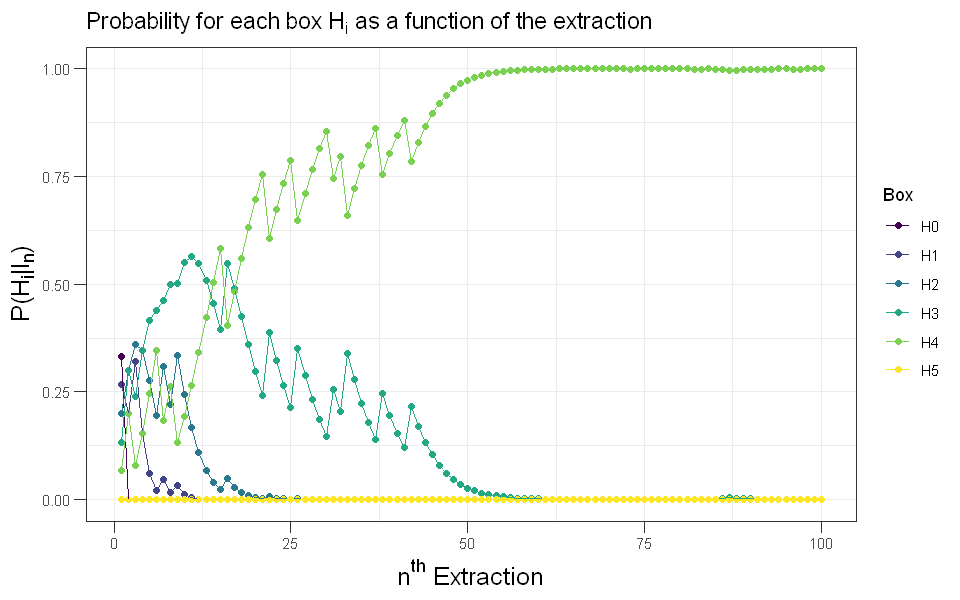

In [15]:
options(repr.plot.width=8, repr.plot.height=5)
ggplot(PBi_g_plot) + 
    geom_point(aes(trials, PBi_g, group= box, colour=box)) +
    geom_line(aes(trials, PBi_g, group = box, colour=box)) +
    labs(title=TeX('Probability for each box $H_i$ as a function of the extraction'), 
         x=TeX('$n^{th}$ Extraction'), y=TeX('$P(H_i | I_n)$'), col='Box') +
    scale_color_viridis(discrete=TRUE)+
    theme(plot.title = element_text(color="black", size=14
                                    , face="bold.italic"), 
              axis.title.x = element_text(color="black", size=15),
              axis.title.y = element_text(color="black", size=15), 
              axis.ticks.length=unit(.25, "cm"),
              axis.text.x = element_text(size=9),
              axis.text.y = element_text(size=9))

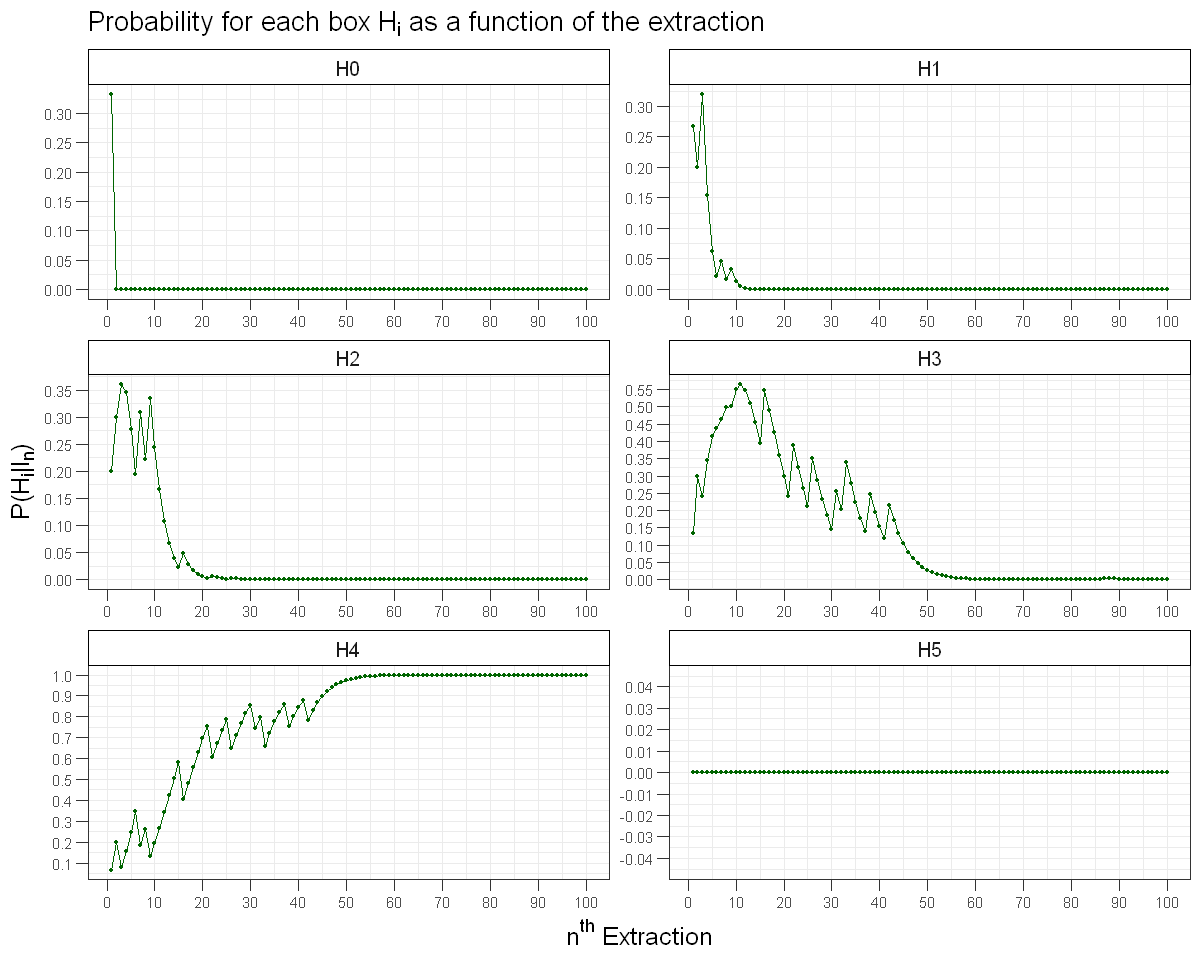

In [16]:
options(repr.plot.width=10, repr.plot.height=8)
plot = ggplot(PBi_g_plot) + geom_point(aes(trials, PBi_g), colour = 'darkgreen', size = 0.8) + 
        geom_line(aes(trials, PBi_g), colour = 'darkgreen', size=0.4)+
        #scale_color_manual(values = c('line' = 'darkblue')) +
        labs(title=TeX('Probability for each box $H_i$ as a function of the extraction'), 
             x=TeX('$n^{th}$ Extraction'), y=TeX('$P(H_i | I_n)$'))+ 
        scale_x_continuous(breaks = scales::pretty_breaks(n = 10))+
        scale_y_continuous(breaks = scales::pretty_breaks(n = 10))+
        theme(plot.title = element_text(color="black", size=16, face="bold.italic"), 
              axis.title.x = element_text(color="black", size=15),
              axis.title.y = element_text(color="black", size=15), 
              axis.ticks.length=unit(.25, "cm"),
              axis.text.x = element_text(size=9),
              axis.text.y = element_text(size=9))
plot + facet_wrap(. ~ box, scales='free', ncol=2)+ theme(strip.text.x = element_text(size=12),
                        strip.background = element_rect(colour="black", fill="white", size=0.5, linetype="solid"))

Although `ggplot2` gives the opportunity to represent data in a more visually pleasing and more customizable way, it is not able to deal with small numbers <br> ($\sim 10^{-30}/10^{-40}$) and therefore in the plots above the smallest probabiities have actually been approximated to zero. It was impossible to use a logarithmic scale: when trying to do so, an error appeared, since the function was basically trying to calculate $\log_{10}(0) \rightarrow \infty$. <br>
This to remark the fact that the probabilites do not reach exactly zero (apart from the case of the first or last box when a ball of the color not present in the box is extracted), even after a long number of iterations (here $100$).

#### Method 2

In [20]:
x=sum(s) # nr of White
PBi = pii_w^x * (1-pii_w)^(n-x) / sum( pii_w^x * (1-pii_w)^(n-x) ) # belief to have picked Bi at the last extraction 
                                                                   # (after having extracted (x) white balls and 
                                                                   # (n-x) black balls)
sum(pii_w * PBi) # belief to get White in a further extraction.

[1] 0.7999435

In [21]:
css = cumsum(s)
PBi_nt = matrix(, nrow = 100, ncol = 6)
for (i in 1:100){
    PBi_nt[i,] = pii_w^css[i] * (1-pii_w)^(i-css[i]) / sum( pii_w^css[i] * (1-pii_w)^(i-css[i]) )
}

In [22]:
PBi_nt_tot = array(PBi_nt) #c(PBi_nt[,1], PBi_nt[,2], PBi_nt[,3], PBi_nt[,4], PBi_nt[,5], PBi_nt[,6])
factor = rep(0:5, each=100)
trials = rep(1:100, times = 6)

In [23]:
PBi_nt_plot = tibble('trials' = trials, 'PBi_nt' = PBi_nt_tot, 'box' = factor)
PBi_nt_plot$box = as.factor(PBi_nt_plot$box)

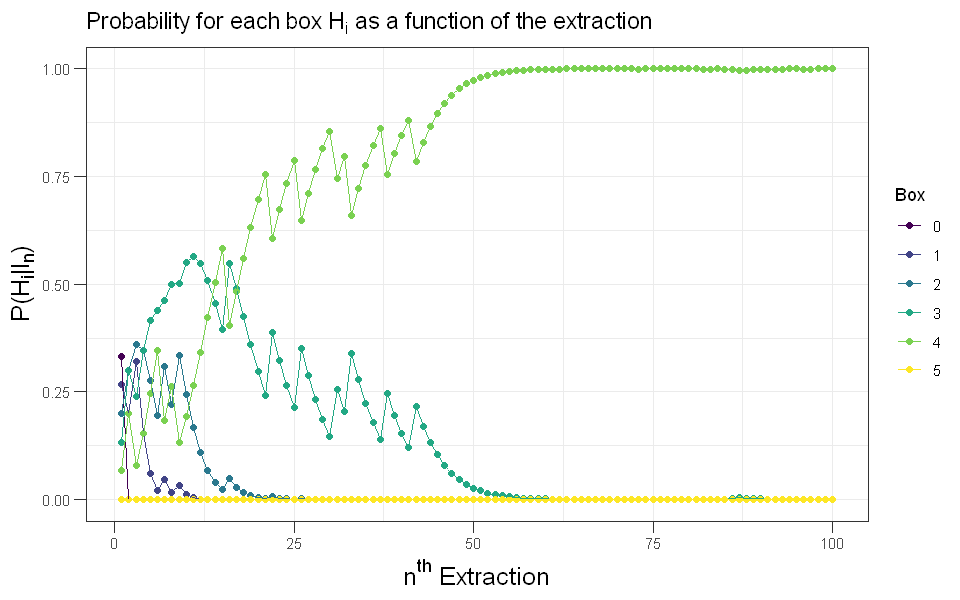

In [24]:
options(repr.plot.width=8, repr.plot.height=5)
ggplot(PBi_nt_plot) + 
    geom_point(aes(trials, PBi_nt, group= box, colour=box)) +
    geom_line(aes(trials, PBi_nt, group = box, colour=box)) +
    labs(title=TeX('Probability for each box $H_i$ as a function of the extraction'), 
         x=TeX('$n^{th}$ Extraction'), y=TeX('$P(H_i | I_n)$'), col='Box') +
    scale_color_viridis(discrete=TRUE)+
    theme(plot.title = element_text(color="black", size=14
                                    , face="bold.italic"), 
              axis.title.x = element_text(color="black", size=15),
              axis.title.y = element_text(color="black", size=15), 
              axis.ticks.length=unit(.25, "cm"),
              axis.text.x = element_text(size=9),
              axis.text.y = element_text(size=9))

## Exercise 3

An important property of the gamma distribution is the so-called _reproductive property_: given a sequence of independent random variable $X_j ∼ Gamma(\alpha_j, \beta)$, it follows that
$$\mathcal{Y}=\sum^n_{j=1} X_j \rightarrow \mathcal{Y} \sim Gamma(\alpha, \beta) \text{ where } \alpha = \sum^n_{j=1} \alpha_j$$
If $\alpha = m$ is an integer, a random variable from gamma distribution $Gamma(m, \beta)$ (also known as **Erlang distribution**) can be obtained by summing $m$ independent exponential random variables $X_j\sim Exp(\beta)$:
$$\mathcal{Y}=\beta \sum^m_{j=1}\left(-\ln \mathcal{U}_j\right)=-\beta \ln \prod^m_{j=1} \mathcal{U}_j$$
Write an algorithm to sample variables from an Erlang distribution $Gamma(m, \beta)$.

In [25]:
m  = 10; beta = 1

In [26]:
erlang_ips = function(m,beta){
    return(-beta*log(prod(runif(m))))
}

erlang_exp = function(m){
    return(sum(rexp(m)))
}

In [27]:
n = 1000
erlang_u = tibble('u' = replicate(n, erlang_ips(m,beta), simplify=TRUE))
erlang_e = tibble('e' = replicate(n, erlang_exp(m), simplify=TRUE))

In [28]:
x = seq(0,30,0.3); bins = 20
fact_u = n*(max(erlang_u$u)-min(erlang_u$u))/bins
fact_e = n*(max(erlang_e$e)-min(erlang_e$e))/bins

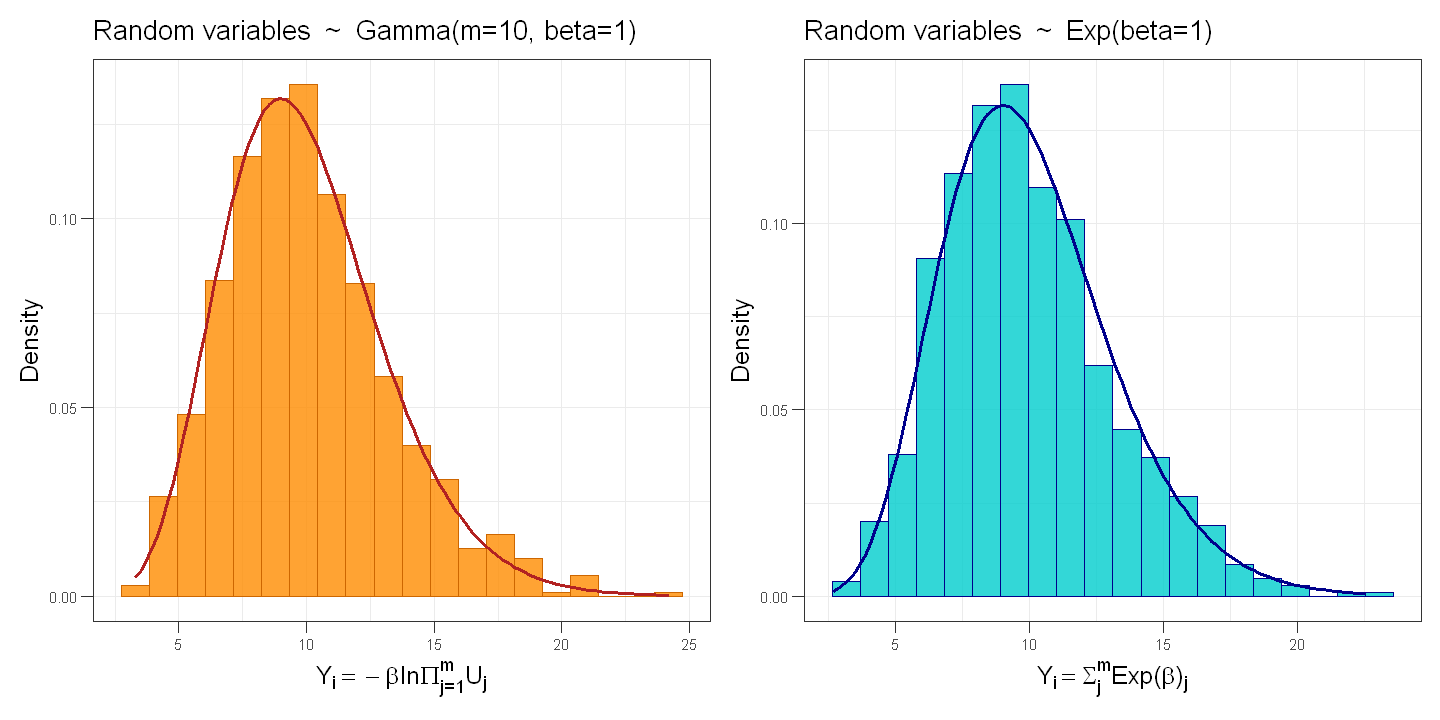

In [29]:
options(repr.plot.width=12, repr.plot.height=6)
p1 = ggplot(erlang_u, aes(x=u)) +
geom_histogram(aes(y=..density..), bins=bins, color='darkorange3', fill='darkorange', alpha=0.8) +
labs(title=TeX('Random variables $\\sim$ Gamma(m=10, beta=1)'), x=TeX('$Y_i = -\\beta \\ln \\Pi^m_{j=1} U_j$'), y='Density') +
stat_function(fun = function(x) {dgamma(x,m,beta)}, color = 'firebrick', size=1)+
theme(plot.title = element_text(color="black", size=16
                                    , face="bold.italic"), 
              axis.title.x = element_text(color="black", size=15),
              axis.title.y = element_text(color="black", size=15), 
              axis.ticks.length=unit(.25, "cm"),
              axis.text.x = element_text(size=9),
              axis.text.y = element_text(size=9))

p2 = ggplot(erlang_e, aes(x=e)) +
geom_histogram(aes(y=..density..), bins=bins, color='darkblue', fill='cyan3', alpha=0.8) +
labs(title=TeX('Random variables $\\sim$ Exp(beta=1)'), x=TeX('$Y_i = \\Sigma^m_j Exp(\\beta)_j$'), y='Density') +
stat_function(fun = function(x) {dgamma(x,m,beta)}, color = 'darkblue', size=1)+
theme(plot.title = element_text(color="black", size=16
                                    , face="bold.italic"), 
              axis.title.x = element_text(color="black", size=15),
              axis.title.y = element_text(color="black", size=15), 
              axis.ticks.length=unit(.25, "cm"),
              axis.text.x = element_text(size=9),
              axis.text.y = element_text(size=9))

p1 + p2

## Exercise 4

One of the first random number generator was proposed by von Neumann, the so-called *middle square* algorithm.<br>
Write R code to implement this type of generator and, given a fixed digit number input, square it and remove the leading and trailing digits, in order to return a number with the same number of digits as the original number.

_Suggestion_: after having squared the number, convert it to a list of characters: <br>
`number <- unlist(strsplit(as.character(x.squared),''))` <br>
and, after having removed the head and tail of the list, convert it back to a number: <br>
`as.numeric(paste(number.after.trimming, collapse=''))`

In [30]:
num_digits = function(int){
    return(floor(log10(int))+1)
}


In [31]:
mid_square_agt = function(seed, n){
    rand_nums = NULL
    if (num_digits(seed) %% 2 == 0){
        cat('With an even seed the algorithm becomes unstable too fast, please enter an uneven seed')
    }
    else {
        # we want our new number to have the same number of digits as the seed, so we need to know how much to cut 
        # after having squared the seed, to do so: 
        cut = (num_digits(seed)-1)/2
        for (i in 1:n){
            seed2 = seed^2
            seed2_chr = unlist(strsplit(as.character(seed2),""))
            middle = ceiling(num_digits(seed2)/2)
            new_seed = seed2_chr[(middle-cut):(middle+cut)]
            seed = as.numeric(paste(new_seed, collapse=""))
            rand_nums = append(rand_nums, seed)   
        }
    }
    return(rand_nums)
}

In [32]:
rand_nums = mid_square_agt(258963478, 10^5)

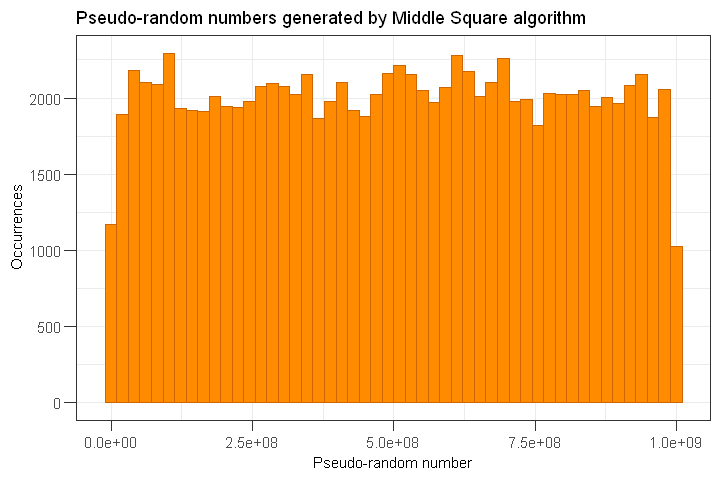

In [33]:
options(repr.plot.width=6, repr.plot.height=4)
rand_nums = tibble('rand_nums' = rand_nums)

ggplot(rand_nums, aes(x=rand_nums)) +
geom_histogram(bins=50, color='darkorange3', fill='darkorange') +
labs(title='Pseudo−random numbers generated by Middle Square algorithm', x='Pseudo−random number', y='Occurrences')+
theme(plot.title = element_text(color="black", size=11), 
              axis.title.x = element_text(color="black", size=9),
              axis.title.y = element_text(color="black", size=9), 
              axis.ticks.length=unit(.25, "cm"),
              axis.text.x = element_text(size=9),
              axis.text.y = element_text(size=9))